STATAPP : EXPLORATION DE LA BDD

Partie 1 : Description générale du dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv('credit_card_transactions-ibm_v2.csv')

In [3]:
df

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386895,1999,1,2020,2,27,22:23,$-54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,NaN,No
24386896,1999,1,2020,2,27,22:24,$54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,NaN,No
24386897,1999,1,2020,2,28,07:43,$59.15,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,NaN,No
24386898,1999,1,2020,2,28,20:10,$43.12,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,NaN,No


On corrige le dataset (Amount)

In [4]:
df['Amount'] = df['Amount'].str.replace('$','')

In [5]:
df['Amount'] = pd.to_numeric(df['Amount'])

Quelques statistiques 

In [6]:
df.describe()

,User,Card,Year,Month,Day,Amount,Merchant Name,Zip,MCC
count,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.150876e+07,2.438690e+07
mean,1.001019e+03,1.351366e+00,2.011955e+03,6.525064e+00,1.571812e+01,4.363401e+01,-4.769230e+17,5.095644e+04,5.561171e+03
std,5.694612e+02,1.407154e+00,5.105921e+00,3.472355e+00,8.794073e+00,8.202239e+01,4.758940e+18,2.939707e+04,8.793154e+02
min,0.000000e+00,0.000000e+00,1.991000e+03,1.000000e+00,1.000000e+00,-5.000000e+02,-9.222899e+18,5.010000e+02,1.711000e+03
25%,5.100000e+02,0.000000e+00,2.008000e+03,3.000000e+00,8.000000e+00,9.200000e+00,-4.500543e+18,2.837400e+04,5.300000e+03
50%,1.006000e+03,1.000000e+00,2.013000e+03,7.000000e+00,1.600000e+01,3.014000e+01,-7.946765e+17,4.674200e+04,5.499000e+03
75%,1.477000e+03,2.000000e+00,2.016000e+03,1.000000e+01,2.300000e+01,6.506000e+01,3.189517e+18,7.756400e+04,5.812000e+03
max,1.999000e+03,8.000000e+00,2.020000e+03,1.200000e+01,3.100000e+01,1.239050e+04,9.223292e+18,9.992800e+04,9.402000e+03


In [7]:
# Nombre d'utilisateurs unique 
len(df['User'].unique())

2000

In [8]:
nb_fraud = df['Is Fraud?'].value_counts()
nb_transaction = df.shape[0]

In [9]:
(nb_fraud/nb_transaction) * 100
# Nombre très faible de fraudes (environ 0.1%)

No     99.87798
Yes     0.12202
Name: Is Fraud?, dtype: float64

In [6]:
# On peut voir que le montant des transactions frauduleuses est faible quand 'Swipe Transaction'
data = df[df['Use Chip'].isin(['Swipe Transaction'])].reset_index(drop=True) 

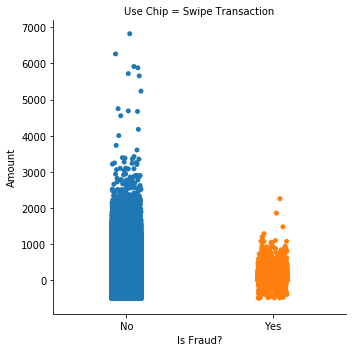

In [7]:
sns.catplot(data = data, x = 'Is Fraud?', y = 'Amount', col = 'Use Chip')
plt.show()

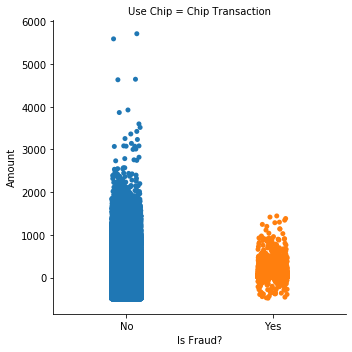

In [8]:
data_chip = df[df['Use Chip'].isin(['Chip Transaction'])].reset_index(drop=True) 
sns.catplot(data = data_chip, x = 'Is Fraud?', y = 'Amount', col = 'Use Chip')
plt.show()

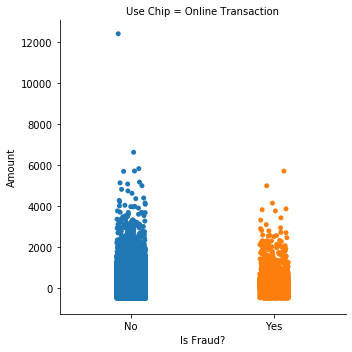

In [9]:
data_online = df[df['Use Chip'].isin(['Online Transaction'])].reset_index(drop=True) 
sns.catplot(data = data_online, x = 'Is Fraud?', y = 'Amount', col = 'Use Chip')
plt.show()


Bases annexes : 

In [26]:
# DF des CB 
df_cards = pd.read_csv('sd254_cards.csv')

# DF des infos utilisateurs 
df_users = pd.read_csv('sd254_users.csv')

# Extrait de df sur User = 0
df_0 = pd.read_csv('User0_credit_card_transactions.csv') 

In [4]:
df_cards

,User,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
0,0,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,0,1,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,0,2,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,0,3,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,0,4,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,1997,1,Amex,Credit,300609782832003,01/2024,663,YES,1,$6900,11/2000,2013,No
6142,1997,2,Visa,Credit,4718517475996018,01/2021,492,YES,2,$5700,04/2012,2012,No
6143,1998,0,Mastercard,Credit,5929512204765914,08/2020,237,NO,2,$9200,02/2012,2012,No
6144,1999,0,Mastercard,Debit,5589768928167462,01/2020,630,YES,1,$28074,01/2020,2020,No


In [5]:
df_users

,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,NaN,Little Neck,NY,11363,40.76,-73.74,$37891,$77254,$191349,701,5
2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,NaN,West Covina,CA,91792,34.02,-117.89,$22681,$33483,$196,698,5
3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,NaN,New York,NY,10069,40.71,-73.99,$163145,$249925,$202328,722,4
4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,NaN,San Francisco,CA,94117,37.76,-122.44,$53797,$109687,$183855,675,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jose Faraday,32,70,1987,7,Male,6577 Lexington Lane,9.0,Freeport,NY,11520,40.65,-73.58,$23550,$48010,$87837,703,3
1996,Ximena Richardson,62,65,1957,11,Female,2 Elm Drive,955.0,Independence,KY,41051,38.95,-84.54,$24218,$49378,$104480,740,4
1997,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3
1998,Juelz Roman,66,60,1954,2,Male,259 Valley Boulevard,NaN,Camp Hill,PA,17011,40.24,-76.92,$25336,$54654,$27241,618,1


In [27]:
df_0

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19958,0,4,2009,2,12,13:03,$9.71,Swipe Transaction,4060646732831064559,La Verne,CA,91750.0,5411,Technical Glitch,No
19959,0,4,2009,2,22,11:58,$27.94,Swipe Transaction,-8129520121141002186,La Verne,CA,91750.0,5211,NaN,No
19960,0,4,2009,2,24,16:53,$13.97,Swipe Transaction,5474320255037684877,Hawthorne,CA,90250.0,5912,NaN,No
19961,0,4,2009,3,29,16:30,$14.27,Swipe Transaction,4060646732831064559,La Verne,CA,91750.0,5411,NaN,No


Partie 3 : Variables d'intêret 

- Somme d'argent depensé sur x jours (7 jours par exemple)
- Fréquence de transactions (si trop de petites transactions ça peut être louche)
- Booléen utilisation de la "Swipe Transaction" (probabilité plus faible d'avoir une transaction si c'est cette utilisation) 
- Alternative à la variable précédente : créer un seuil de montant à partir duquel on dit c'est forcément pas une fraude (cf les résultats sur les montants pour les fraudes)
- Nombre de villes/d'états associés à une carte (si le nombre est trop élevé, risque de fraude) ou variable qui indique le lieu et la date de la date de la dernière transaction faite avec la même carte (si trop loin dans un temps trop proche alors fraude)

Partie 4 : Conclusions "métiers"


Risques éthiques : si on fait des "clusters" selon la zone géographique peut poser problème. Même soucis avec le sexe et le revenu.